<a href="https://colab.research.google.com/github/jtinklerdav/jtinklerdav.github.io/blob/main/Machine_Learninig_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarites between the 9 countries

In this code I apply supervised machine learning to calculate the similarites of the 9 selected countries in my project. This will allow me to consider whether new world and old world wine producers act similarly as well as conssider emerging markets too.


In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
raw = pd.read_csv('project_machine.csv')

In [3]:
raw.columns

Index(['Country', 'Continent_div', 'Continent', 'Production', 'Surface area',
       'Consumption', 'Import', 'Export', 'AvgTemp',
       'Average precipitation (mm in depth per year)'],
      dtype='object')

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       9 non-null      object 
 1   Continent_div                                 9 non-null      int64  
 2   Continent                                     9 non-null      object 
 3   Production                                    9 non-null      float64
 4   Surface area                                  9 non-null      float64
 5   Consumption                                   9 non-null      float64
 6   Import                                        9 non-null      float64
 7   Export                                        9 non-null      float64
 8   AvgTemp                                       9 non-null      float64
 9   Average precipitation (mm in depth per year)  9 non-null      int64  

In [6]:
len(raw),len(raw['Country'].unique())

(9, 9)

In [7]:
df=raw.drop(['Continent'],axis=1).set_index('Country')
df

,Continent_div,Production,Surface area,Consumption,Import,Export,AvgTemp,Average precipitation (mm in depth per year)
Country,,,,,,,,
Algeria,1,1.368268,0.001683,1.014799,0.154478,0.010718,22.50,89
Argentina,1,28.690896,0.004742,18.802575,0.100536,17.464005,14.80,591
Australia,1,46.588081,0.005692,22.585684,22.747866,81.142386,21.65,534
China,2,0.554461,0.000553,1.062930,1.724998,0.058531,7.50,645
France,2,62.619557,0.011789,36.678590,14.734377,162.820243,10.70,867
Italy,2,79.955220,0.012007,38.015441,6.279798,121.116792,13.45,832
New Zealand,1,58.425995,0.007760,17.916781,27.106793,239.069388,10.55,1732
South Africa,1,16.363538,0.002179,6.584195,0.881136,11.178412,17.75,495
United Kingdom,3,0.117768,0.000007,19.430241,65.946348,12.487739,8.45,1220


In [8]:
X = df[[i for i in df.columns if i!='Continent_div']].fillna(0)
y = df[[i for i in df.columns if i=='Continent_div']]['Continent_div'].values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
raw.set_index('Continent_div')['Continent'].drop_duplicates()

Continent_div
1       Africa
1    New World
2         Asia
2    Old World
3       Europe
Name: Continent, dtype: object

In [11]:
labels=raw.set_index('Continent_div')['Continent'].drop_duplicates().values


**Having created a matrix which is in the correct format to be analysed I now create the dendogram**


In [12]:
import scipy.cluster.hierarchy as sch

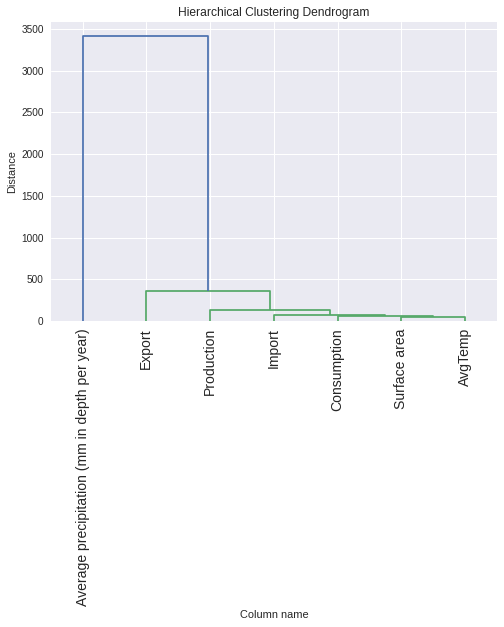

In [13]:
Z = sch.linkage(X.T, method='ward', metric='euclidean')

# Plot dendogram
# plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Column name')
plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=X.columns
)
plt.show()

**Now I am going to create the dendogram by dropping the continent values and settting each coutry as an index**

In [14]:
X2=raw.set_index('Country').drop(['Continent_div','Continent'],axis=1).fillna(0)
X2

,Production,Surface area,Consumption,Import,Export,AvgTemp,Average precipitation (mm in depth per year)
Country,,,,,,,
Algeria,1.368268,0.001683,1.014799,0.154478,0.010718,22.50,89
Argentina,28.690896,0.004742,18.802575,0.100536,17.464005,14.80,591
Australia,46.588081,0.005692,22.585684,22.747866,81.142386,21.65,534
China,0.554461,0.000553,1.062930,1.724998,0.058531,7.50,645
France,62.619557,0.011789,36.678590,14.734377,162.820243,10.70,867
Italy,79.955220,0.012007,38.015441,6.279798,121.116792,13.45,832
New Zealand,58.425995,0.007760,17.916781,27.106793,239.069388,10.55,1732
South Africa,16.363538,0.002179,6.584195,0.881136,11.178412,17.75,495
United Kingdom,0.117768,0.000007,19.430241,65.946348,12.487739,8.45,1220


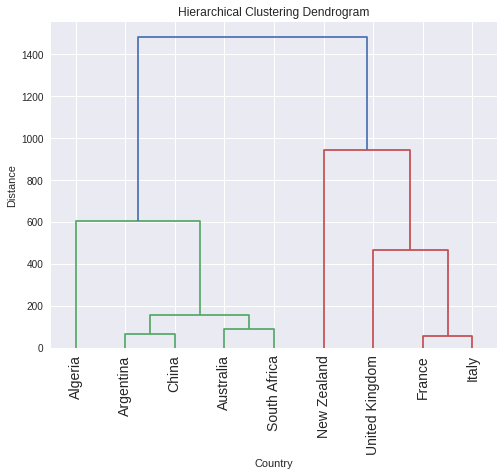

In [15]:
Z = sch.linkage(X2, method='ward', metric='euclidean')

# Plot dendogram
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=X2.index
)
plt.show()